In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
customer_data = pd.read_csv('../Social_Network_Ads.csv')

In [3]:
customer_data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
# split iinto feature matrix (X) and target vector (y)
X = customer_data.iloc[:, :-1].values
y = customer_data.iloc[:,-1].values

In [20]:
# Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Apply a scaler to unify the feature matrix
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [22]:
# Perform SVM
from sklearn.svm import SVC
svClassifier =  SVC(kernel='linear')
svClassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [38]:
# Check the accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score
value = confusion_matrix(y_test, y_pred)
print(value)
accuracy_score(y_test, y_pred)

[[50  2]
 [ 9 19]]


0.8625

In [23]:
svClassifier.predict(X_test)

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [24]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [25]:
y_pred = svClassifier.predict(X_test)

In [26]:
y_pred.shape

(80,)

In [27]:
y_test.shape

(80,)

In [33]:
comparison = np.concatenate((y_test.reshape(-1,1), y_pred.reshape(-1,1)), axis=-1)

In [36]:
df = pd.DataFrame(comparison, columns=['Actual', 'Prediction'])

In [37]:
df.replace(to_replace=(0,1), value=['Not Purchased', 'Purchased'])

,Actual,Prediction
0,Not Purchased,Not Purchased
1,Purchased,Purchased
2,Not Purchased,Not Purchased
3,Purchased,Purchased
4,Not Purchased,Not Purchased
...,...,...
75,Not Purchased,Not Purchased
76,Purchased,Purchased
77,Purchased,Purchased
78,Not Purchased,Not Purchased


C:\Users\emax4\AppData\Local\Temp\ipykernel_26664\509806397.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


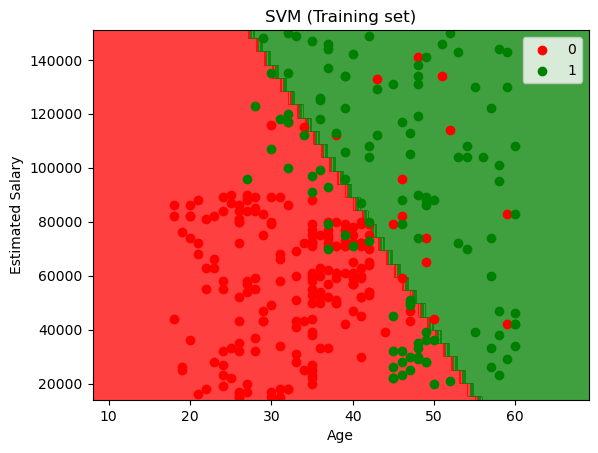

In [40]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc_X.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, svClassifier.predict(sc_X.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\emax4\AppData\Local\Temp\ipykernel_26664\917032479.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


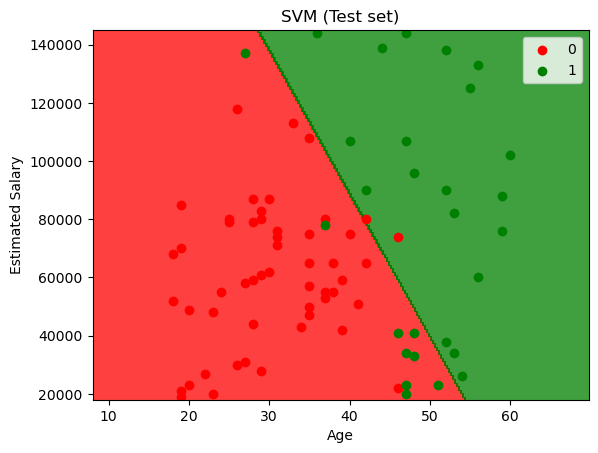

In [43]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc_X.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, svClassifier.predict(sc_X.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()